In [1]:
from os.path import join

import torch
import torchvision

import matplotlib.pyplot as plt

In [2]:
scale = 8

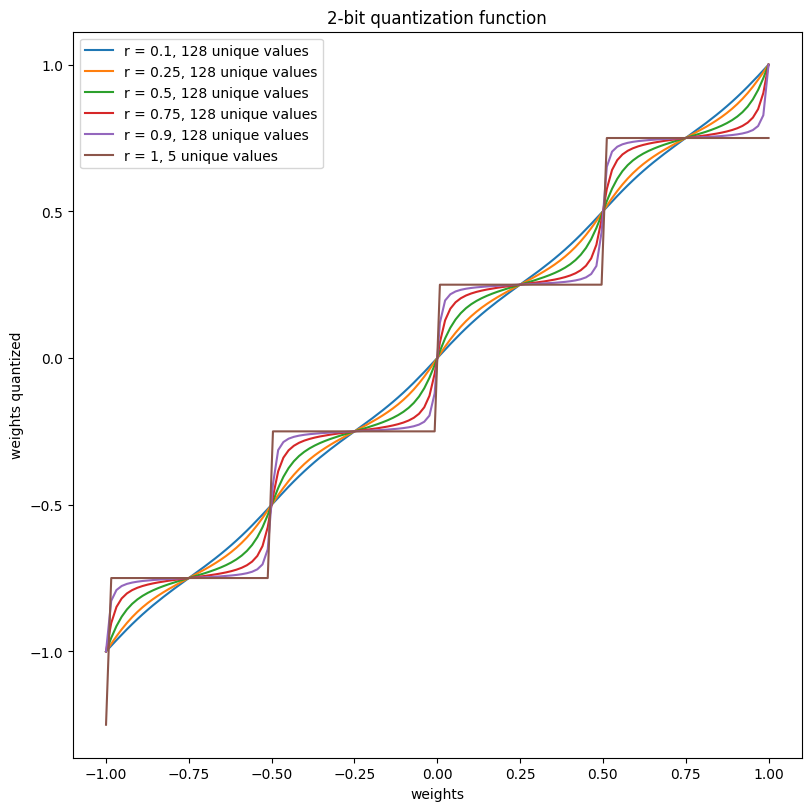

In [3]:
from quantization import quantization_fn

n_values = 128
range_clip = 1
quantization_bits = 2
weights = torch.linspace(-range_clip, range_clip, n_values)
fig, ax = plt.subplots(1,1, constrained_layout=True, figsize=(scale, scale))
ax.set_xlabel("weights")
ax.set_ylabel("weights quantized")
for r in [0.1,0.25, 0.5, 0.75, 0.9, 1]:
    weights_quantized = quantization_fn(weights.clone(),
                        r=r, quantization_bits=quantization_bits, range_clip=range_clip)
    ax.plot(weights, weights_quantized, label=f"r = {r}, {len(weights_quantized.unique())} unique values")
    # print(len(weights_quantized.unique()))
ax.set_title(f"{quantization_bits}-bit quantization function")
plt.legend()
plt.show()

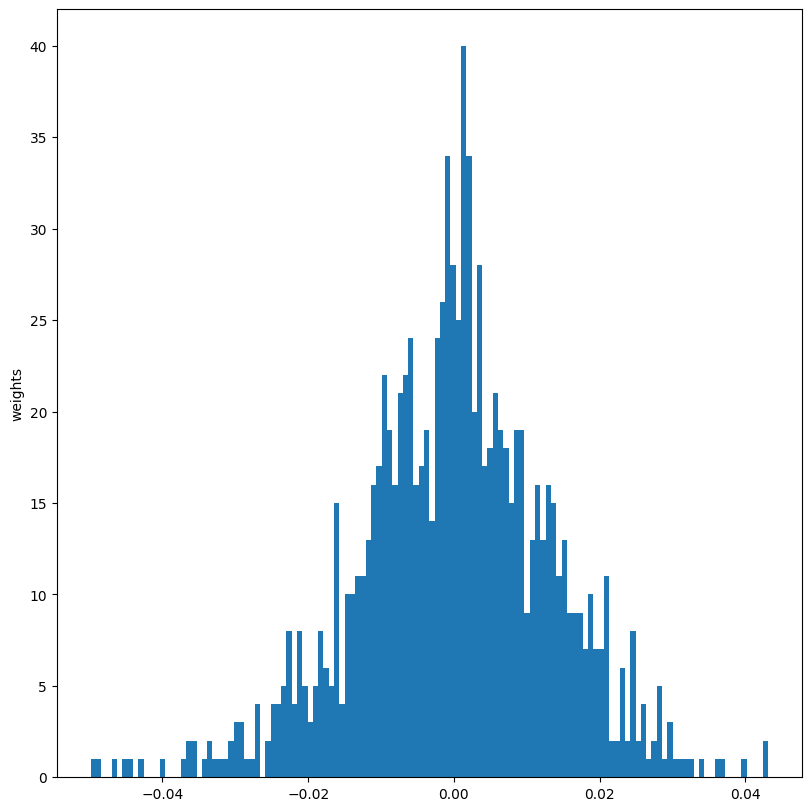

In [4]:
from utils import get_flattened_weights

model = torchvision.models.vit_b_32()
model.load_state_dict(torch.load(join("models", "weights", "imagenet", "vit_b_32.pth")))
weights = get_flattened_weights(model)

fig, ax = plt.subplots(1,1, constrained_layout=True, figsize=(scale, scale))
ax.set_ylabel("weights")
ax.hist(weights, bins=128)
# for r in [0.1,0.25, 0.5, 0.75, 0.9, 1]:
#     weights_quantized = quantization_fn(weights.clone(),
#                         r=r, quantization_bits=quantization_bits, range_clip=range_clip)
#     ax.plot(weights, weights_quantized, label=f"r = {r}, {len(weights_quantized.unique())} unique values")
#     # print(len(weights_quantized.unique()))
# ax.set_title(f"{quantization_bits}-bit quantization function")
# plt.legend()
plt.show()